# 本题代码显示的思路是通过机器学习，线性回归一天预测曲线。更多思考，请参见论文，论文提供多种模型假设，且分析更为深入。此处只用于可视化展示。

## 调用相关库

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import genfromtxt
plt.rcParams['figure.figsize'] = (20.0,10.0)

## 读取第一问已经得出的数据

In [2]:
df2018n = pd.read_excel('df2018n_data.xlsx')

## 查看读取是否成功

In [3]:
df2018n.shape

(365, 13)

## 手动输入2018年所有的星期一日期，随后利用函数得出周二到周日的日期

In [4]:
def day_add1(list):
    for i in range(len(list)):
        list[i]=list[i] + 1
    return list

In [5]:
Monday = [20180101,20180108,20180115,20180122,20180129,
          20180205,20180212,20180219,20180226,
          20180305,20180312,20180319,20180326,
          20180402,20180409,20180416,20180423,20180430,
          20180507,20180514,20180521,20180528,
          20180604,20180611,20180618,20180625,
          20180702,20180709,20180716,20180723,20180730,
          20180806,20180813,20180820,20180827,
          20180903,20180910,20180917,20180924,
          20181001,20181008,20181015,20181022,20181029,
          20181105,20181112,20181119,20181126,
          20181203,20181210,20181217,20181224,20181231]
Tuesday = [20180102,20180109,20180116,20180123,20180130,
           20180206,20180213,20180220,20180227,
           20180306,20180313,20180320,20180327,
           20180403,20180410,20180417,20180424,
           20180501,20180508,20180515,20180522,20180529,
           20180605,20180612,20180619,20180626,
           20180703,20180710,20180717,20180724,20180731,
           20180807,20180814,20180821,20180828,
           20180904,20180911,20180918,20180925,
           20181002,20181009,20181016,20181023,20181030,
           20181106,20181113,20181120,20181127,
           20181204,20181211,20181218,20181225]
Wendnesday = [20180103,20180110,20180117,20180124,20180131,
              20180207,20180214,20180221,20180228,
              20180307,20180314,20180321,20180328,
              20180404,20180411,20180418,20180425,
              20180502,20180509,20180516,20180523,20180530,
              20180606,20180613,20180620,20180627,
              20180704,20180711,20180718,20180725,
              20180801,20180808,20180815,20180822,20180829,
              20180905,20180912,20180919,20180926,
              20181003,20181010,20181017,20181024,20181031,
              20181107,20181114,20181121,20181128,
              20181205,20181212,20181219,20181226]
Thursday = [20180104,20180111,20180118,20180125,
            20180201,20180208,20180215,20180222,
            20180301,20180308,20180315,20180322,20180329,
            20180405,20180412,20180419,20180426,
            20180503,20180510,20180517,20180524,20180531,
            20180607,20180614,20180621,20180628,
            20180705,20180712,20180719,20180726,
            20180802,20180809,20180816,20180823,20180830,
            20180906,20180913,20180920,20180927,
            20181004,20181011,20181018,20181025,
            20181101,20181108,20181115,20181122,20181129,
            20181206,20181213,20181220,20181227]
Friday = [20180105,20180112,20180119,20180126,
          20180202,20180209,20180216,20180223,
          20180302,20180309,20180316,20180323,20180330,
          20180406,20180413,20180420,20180427,
          20180504,20180511,20180518,20180525,
          20180601,20180608,20180615,20180622,20180629,
          20180706,20180713,20180720,20180727,
          20180803,20180810,20180817,20180824,20180831,
          20180907,20180914,20180921,20180928,
          20181005,20181012,20181019,20181026,
          20181102,20181109,20181116,20181123,20181130,
          20181207,20181214,20181221,20181228]
Saturday = [20180106,20180113,20180120,20180127,
            20180203,20180210,20180217,20180224,
            20180303,20180310,20180317,20180324,20180331,
            20180407,20180414,20180421,20180428,
            20180505,20180512,20180519,20180526,
            20180602,20180609,20180616,20180623,20180630,
            20180707,20180714,20180721,20180728,
            20180804,20180811,20180818,20180825,
            20180901,20180908,20180915,20180922,20180929,
            20181006,20181013,20181020,20181027,
            20181103,20181110,20181117,20181124,20181131,
            20181208,20181215,20181222,20181229]
Sunday =[20180107,20180114,20180121,20180128,
         20180204,20180211,20180218,20180225,
         20180304,20180311,20180318,20180325,
         20180401,20180408,20180415,20180422,20180429,
         20180506,20180513,20180520,20180527,
         20180603,20180610,20180617,20180624,
         20180701,20180708,20180715,20180722,20180729,
         20180805,20180812,20180819,20180826,
         20180902,20180909,20180916,20180923,20180930,
         20181007,20181014,20181021,20181028,
         20181104,20181111,20181118,20181125,
         20181201,20181209,20181216,20181223,20181230]

## 将数据处理成可供学习的数据结构，此处我们只可视化入境，出境思路一致，就略去。

In [6]:
df2018n_Monday=df2018n[df2018n['Date'].isin(Monday)]
df2018n_Monday = df2018n_Monday.fillna(0)

In [7]:
sum_Monday = df2018n_Monday['5-1-41']+df2018n_Monday['5-1-42']+df2018n_Monday['5-1-43']+df2018n_Monday['6-1-41']+df2018n_Monday['6-1-42']+df2018n_Monday['6-1-43']
Mon = DataFrame(sum_Monday)
Mon.insert(0,'week',1)
Mon.rename(columns = {0:'Quantity'})
Mon.head()

,week,0
0,1,3838.0
7,1,7274.0
14,1,7683.0
21,1,7549.0
28,1,7630.0


In [8]:
df2018n_Tuesday=df2018n[df2018n['Date'].isin(Tuesday)]
df2018n_Tuesday = df2018n_Tuesday.fillna(0)

In [9]:
sum_Tuesday = df2018n_Tuesday['5-1-41']+df2018n_Tuesday['5-1-42']+df2018n_Tuesday['5-1-43']+df2018n_Tuesday['6-1-41']+df2018n_Tuesday['6-1-42']+df2018n_Tuesday['6-1-43']
Tue = DataFrame(sum_Tuesday)
Tue.insert(0,'week',2)
Tue.rename(columns = {0:'Quantity'})
Tue.head()

,week,0
1,2,6594.0
8,2,6931.0
15,2,7264.0
22,2,7281.0
29,2,7694.0


In [10]:
df2018n_Wendnesday=df2018n[df2018n['Date'].isin(Wendnesday)]
df2018n_Wendnesday= df2018n_Wendnesday.fillna(0)

In [11]:
sum_Wendnesday = df2018n_Wendnesday['5-1-41']+df2018n_Wendnesday['5-1-42']+df2018n_Wendnesday['5-1-43']+df2018n_Wendnesday['6-1-41']+df2018n_Wendnesday['6-1-42']+df2018n_Wendnesday['6-1-43']
Wed = DataFrame(sum_Wendnesday)
Wed.insert(0,'week',3)
Wed.rename(columns = {0:'Quantity'})
Wed.head()

,week,0
2,3,6586.0
9,3,6644.0
16,3,7251.0
23,3,7282.0
30,3,7550.0


In [12]:
df2018n_Thursday=df2018n[df2018n['Date'].isin(Thursday)]
df2018n_Thursday= df2018n_Thursday.fillna(0)

In [13]:
sum_Thursday = df2018n_Thursday['5-1-41']+df2018n_Thursday['5-1-42']+df2018n_Thursday['5-1-43']+df2018n_Thursday['6-1-41']+df2018n_Thursday['6-1-42']+df2018n_Thursday['6-1-43']
Thu = DataFrame(sum_Thursday)
Thu.insert(0,'week',4)
Thu.rename(columns = {0:'Quantity'})
Thu.head()

,week,0
3,4,6864.0
10,4,7097.0
17,4,7057.0
24,4,7222.0
31,4,7560.0


In [14]:
df2018n_Friday=df2018n[df2018n['Date'].isin(Friday)]
df2018n_Friday= df2018n_Friday.fillna(0)

In [15]:
sum_Friday = df2018n_Friday['5-1-41']+df2018n_Friday['5-1-42']+df2018n_Friday['5-1-43']+df2018n_Friday['6-1-41']+df2018n_Friday['6-1-42']+df2018n_Friday['6-1-43']
Fri = DataFrame(sum_Friday)
Fri.insert(0,'week',5)
Fri.rename(columns = {0:'Quantity'})
Fri.shape

(52, 2)

In [16]:
df2018n_Saturday=df2018n[df2018n['Date'].isin(Saturday)]
df2018n_Saturday= df2018n_Saturday.fillna(0)

In [17]:
sum_Saturday = df2018n_Saturday['5-1-41']+df2018n_Saturday['5-1-42']+df2018n_Saturday['5-1-43']
Sat = DataFrame(sum_Saturday)
Sat.insert(0,'week',6)
Sat.rename(columns = {0:'Quantity'})
Sat.shape

(51, 2)

In [18]:
df2018n_Sunday=df2018n[df2018n['Date'].isin(Sunday)]
df2018n_Sunday= df2018n_Sunday.fillna(0)

In [19]:
sum_Sunday = df2018n_Sunday['5-1-41']+df2018n_Sunday['5-1-42']+df2018n_Sunday['5-1-43']+df2018n_Sunday['6-1-41']+df2018n_Sunday['6-1-42']+df2018n_Sunday['6-1-43']
Sun = DataFrame(sum_Sunday)
Sun.insert(0,'week',7)
Sun.rename(columns = {0:'Quantity'})
Sun.shape

(52, 2)

## 合并周日到周日的数据，并修改索引

In [20]:
Week = pd.concat([Mon,Tue,Wed,Thu,Fri,Sat,Sun])
Week = Week.rename(columns = {0:'Quantity'})
Week.index = range(len(Week))

## 生成csv文件

In [21]:
Week.to_csv('Week.csv')

##  导入数据，确定x_data,y_data，并可视化结果。（不难看出，我们应该剔除一些有误数据，但时间有限，暂不剔除）

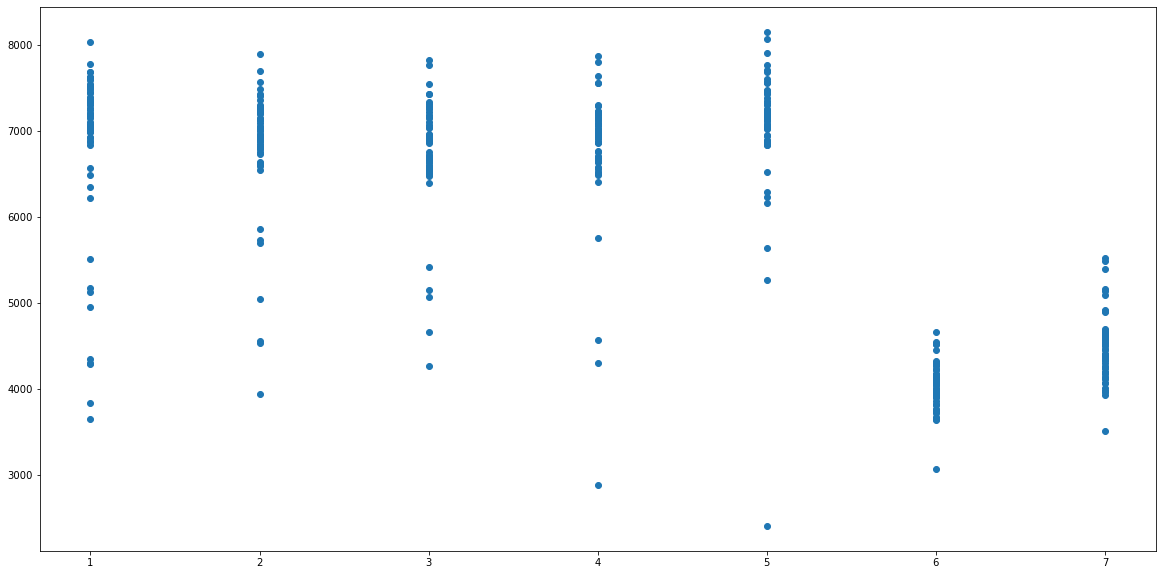

In [22]:
# 加载数据
data = genfromtxt("Week.csv", delimiter=",")
x_data = data[1:, 1]
y_data = data[1:, 2]
plt.scatter(x_data, y_data)
plt.show()
# print(x_data, y_data)

## 生成一次函数，看看走势。

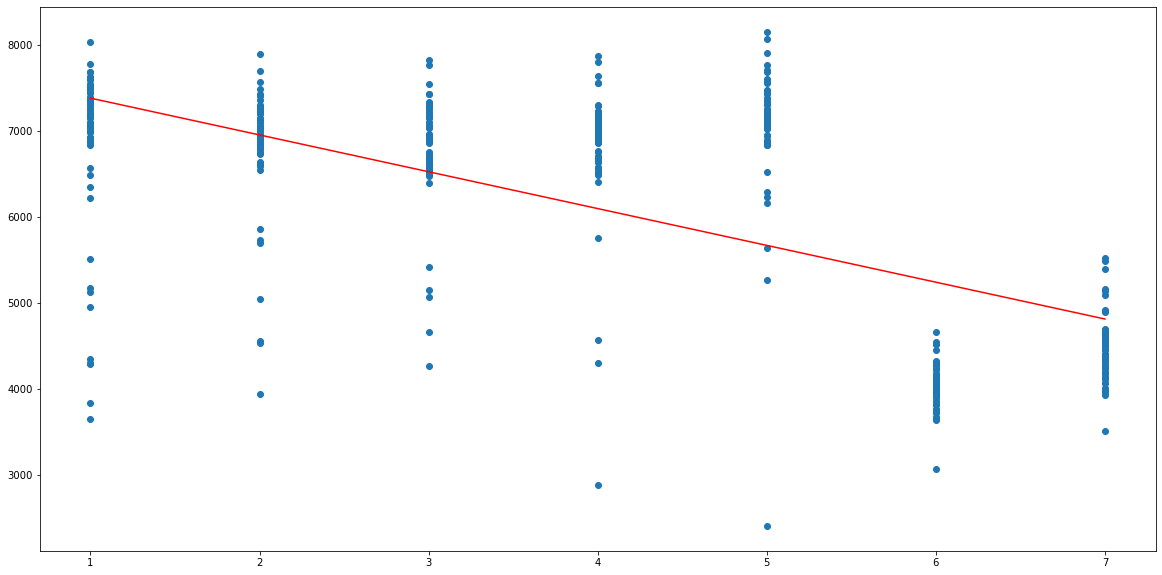

In [23]:
# 一维变二维
x_data = x_data[:,np.newaxis]
y_data = y_data[:,np.newaxis]

# 创建并拟合模型
model = LinearRegression()
model.fit(x_data, y_data)

plt.scatter(x_data, y_data)
plt.plot(x_data, model.predict(x_data), 'r')
plt.show()

## 多项式回归，此后，如果得知某天为周几，那么我们有自信说，该天的通行量在回归量附近。

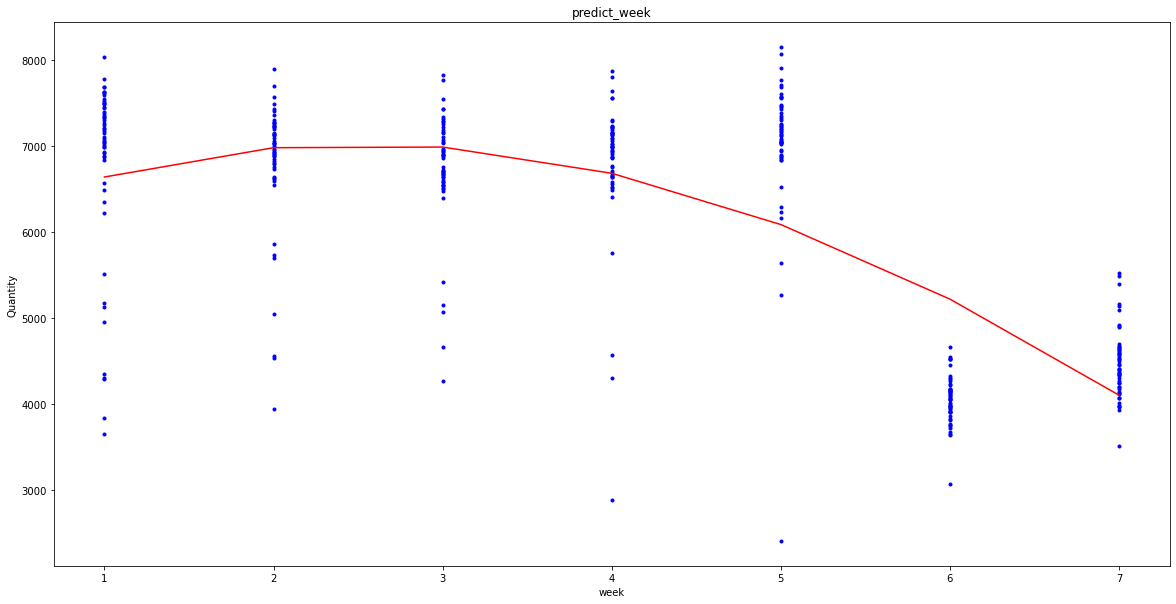

In [24]:
# 定义多项式回归, degree的值可以调节多项式的特征
poly_reg = PolynomialFeatures(degree=3)
# 特征处理
x_poly = poly_reg.fit_transform(x_data)

# 定义回归模型
reg = LinearRegression()
reg.fit(x_poly, y_data)

plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, reg.predict(x_poly), 'r')
plt.xlabel('week')
plt.ylabel('Quantity')
plt.title('predict_week')
plt.show()

# 接下来，我们分析每天对应时刻的通行量数据

## 导入数据 此处仅处理四月数据

In [25]:
df201804t = pd.read_excel('df201804t_data.xlsx')

In [26]:
df201804t['Date'].tolist()

[2018040106,
 2018040107,
 2018040108,
 2018040109,
 2018040110,
 2018040111,
 2018040112,
 2018040113,
 2018040114,
 2018040115,
 2018040116,
 2018040117,
 2018040118,
 2018040119,
 2018040120,
 2018040121,
 2018040122,
 2018040123,
 2018040200,
 2018040206,
 2018040207,
 2018040208,
 2018040209,
 2018040210,
 2018040211,
 2018040212,
 2018040213,
 2018040214,
 2018040215,
 2018040216,
 2018040217,
 2018040218,
 2018040219,
 2018040220,
 2018040221,
 2018040222,
 2018040223,
 2018040306,
 2018040307,
 2018040308,
 2018040309,
 2018040310,
 2018040311,
 2018040312,
 2018040313,
 2018040314,
 2018040315,
 2018040316,
 2018040317,
 2018040318,
 2018040319,
 2018040320,
 2018040321,
 2018040322,
 2018040323,
 2018040400,
 2018040406,
 2018040407,
 2018040408,
 2018040409,
 2018040410,
 2018040411,
 2018040412,
 2018040413,
 2018040414,
 2018040415,
 2018040416,
 2018040417,
 2018040418,
 2018040419,
 2018040420,
 2018040421,
 2018040422,
 2018040423,
 2018040506,
 2018040507,
 2018040508,

In [27]:
df201804t = df201804t.fillna(0)
def get_hour(s):
    list = s.tolist()
    for i in range(len(list)):
        list[i] = int(round(round(list[i]/100,2)-float(int(round(list[i]/100,2))),2)*100)
    return list

In [28]:
list = get_hour(df201804t['Date'])
list

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 

In [29]:
s4 = df201804t['5-1-41']+df201804t['5-1-42']+df201804t['5-1-43']+df201804t['6-1-41']+df201804t['6-1-42']+df201804t['6-1-43']

In [30]:
df_4hour = DataFrame([list,s4.tolist()],index=['hour','Quantity']).T
df_4hour.drop(index = df[df['hour']==0].index,inplace=True)#剔除ToolType的冗余项
df_4hour

NameError: name 'df' is not defined

In [31]:
g_4hour = df_4hour.groupby(['hour'])
g_4hour.groups

{0.0: [18, 55, 128, 471], 6.0: [0, 19, 37, 56, 74, 92, 110, 129, 147, 165, 183, 201, 219, 237, 255, 273, 291, 309, 327, 345, 363, 381, 399, 417, 435, 453, 472, 490, 508, 526], 7.0: [1, 20, 38, 57, 75, 93, 111, 130, 148, 166, 184, 202, 220, 238, 256, 274, 292, 310, 328, 346, 364, 382, 400, 418, 436, 454, 473, 491, 509, 527], 8.0: [2, 21, 39, 58, 76, 94, 112, 131, 149, 167, 185, 203, 221, 239, 257, 275, 293, 311, 329, 347, 365, 383, 401, 419, 437, 455, 474, 492, 510, 528], 9.0: [3, 22, 40, 59, 77, 95, 113, 132, 150, 168, 186, 204, 222, 240, 258, 276, 294, 312, 330, 348, 366, 384, 402, 420, 438, 456, 475, 493, 511, 529], 10.0: [4, 23, 41, 60, 78, 96, 114, 133, 151, 169, 187, 205, 223, 241, 259, 277, 295, 313, 331, 349, 367, 385, 403, 421, 439, 457, 476, 494, 512, 530], 11.0: [5, 24, 42, 61, 79, 97, 115, 134, 152, 170, 188, 206, 224, 242, 260, 278, 296, 314, 332, 350, 368, 386, 404, 422, 440, 458, 477, 495, 513, 531], 12.0: [6, 25, 43, 62, 80, 98, 116, 135, 153, 171, 189, 207, 225, 243, 26

In [32]:
g6 = g_4hour.get_group(6)
g7 = g_4hour.get_group(7)
g8 = g_4hour.get_group(8)
g9 = g_4hour.get_group(9)
g10 = g_4hour.get_group(10)
g11 = g_4hour.get_group(11)
g12 = g_4hour.get_group(12)
g13 = g_4hour.get_group(13)
g14 = g_4hour.get_group(14)
g15 = g_4hour.get_group(15)
g16 = g_4hour.get_group(16)
g17 = g_4hour.get_group(17)
g18 = g_4hour.get_group(18)
g19 = g_4hour.get_group(19)
g20 = g_4hour.get_group(20)
g21 = g_4hour.get_group(21)
g22 = g_4hour.get_group(22)
g23 = g_4hour.get_group(23)

In [33]:
g = pd.concat([g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23])

In [34]:
list = df201804t['Date'].tolist()

In [35]:
M4 = DataFrame(s4)
M4.insert(0,'time',list)
M4.rename(columns = {0:'Quantity'})

,time,Quantity
0,2018040106,51.0
1,2018040107,133.0
2,2018040108,229.0
3,2018040109,306.0
4,2018040110,288.0
...,...,...
539,2018043019,375.0
540,2018043020,389.0
541,2018043021,364.0
542,2018043022,281.0


## 数据处理完后，我们重复上面步骤

In [36]:
g.to_csv('M4.csv')

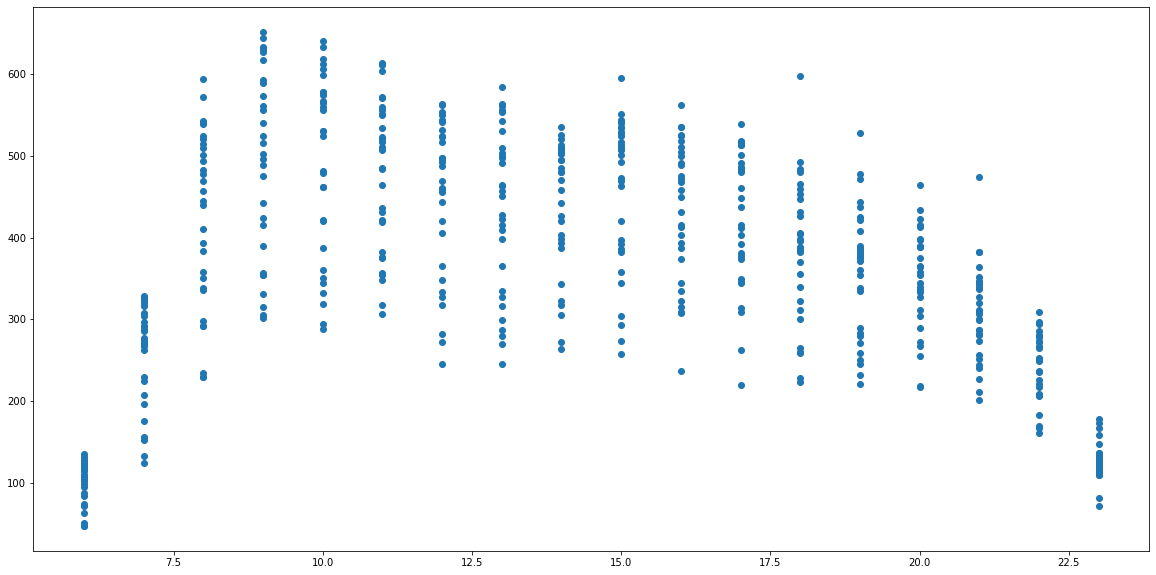

In [37]:
# 加载数据
data = genfromtxt("M4.csv", delimiter=",")
x_data = data[1:, 1]
y_data = data[1:, 2]
plt.scatter(x_data, y_data)
plt.show()
# print(x_data, y_data)

## 看看走势

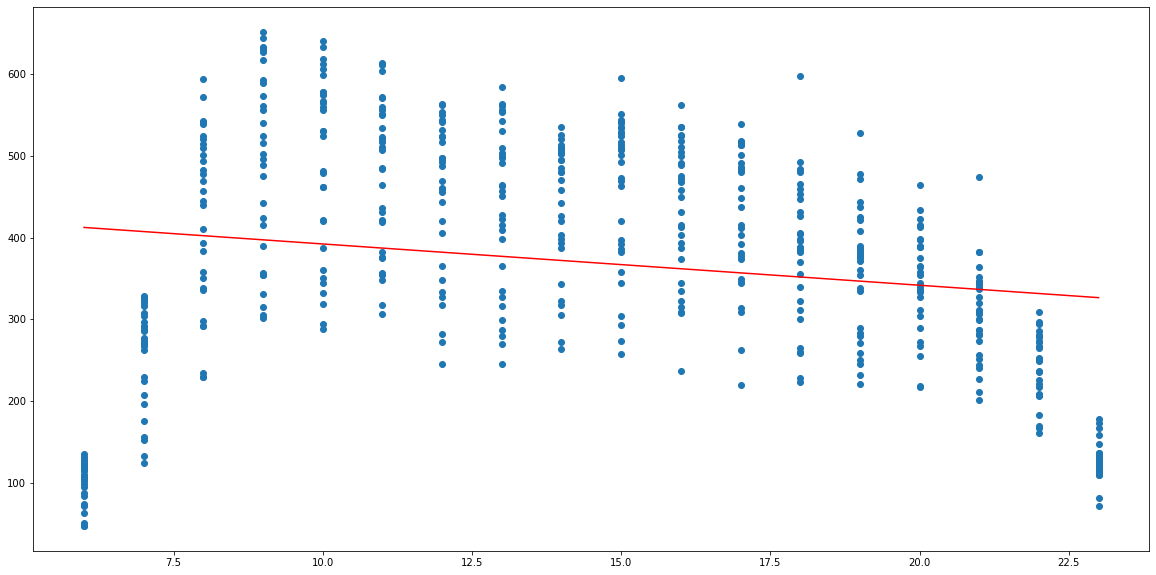

In [38]:
# 一维变二维
x_data = x_data[:,np.newaxis]
y_data = y_data[:,np.newaxis]

# 创建并拟合模型
model = LinearRegression()
model.fit(x_data, y_data)

plt.scatter(x_data, y_data)
plt.plot(x_data, model.predict(x_data), 'r')
plt.show()

## 以下是18年4月每一天6-23h拟合出的回归线，数据没有采用更多，数据增多并剔除有误项，得到的回归线可以使我们有自信说，该天某一个时刻的通量在回归量附近。

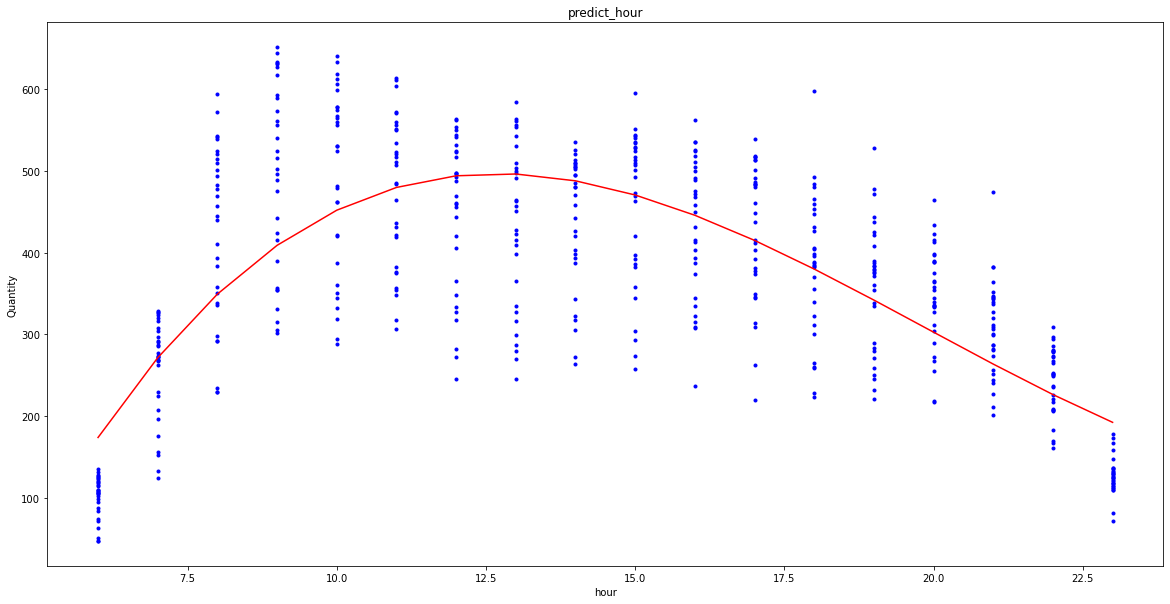

In [39]:
# 定义多项式回归, degree的值可以调节多项式的特征
poly_reg = PolynomialFeatures(degree=3)
# 特征处理
x_poly = poly_reg.fit_transform(x_data)

# 定义回归模型
reg = LinearRegression()
reg.fit(x_poly, y_data)

plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, reg.predict(x_poly), 'r')
plt.xlabel('hour')
plt.ylabel('Quantity')
plt.title('predict_hour')
plt.show()

## 重庆邮电大学2021数模A题第二问 有关python数据回归及可视化的分析 代码编写：江佳骏